In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
df = pd.read_csv('london_merged_v4.csv')


In [3]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,19:00,493,9.0,6.0,82.0,17.0,Cloudy,4,0.0,1.0,3.0
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,20:00,465,8.5,6.5,84.5,13.0,Cloudy,4,0.0,1.0,3.0
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,21:00,474,8.0,6.0,87.0,12.0,Cloudy,4,0.0,1.0,3.0
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,22:00,587,8.0,6.0,90.0,12.0,Cloudy,4,0.0,1.0,3.0


In [4]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,17337,2016-12-31 19:00:00,31-12-2016,2016,Dec,31,Saturday,52,19:00,493,9.0,6.0,82.0,17.0,Cloudy,4,0.0,1.0,3.0
17338,17338,2016-12-31 20:00:00,31-12-2016,2016,Dec,31,Saturday,52,20:00,465,8.5,6.5,84.5,13.0,Cloudy,4,0.0,1.0,3.0
17339,17339,2016-12-31 21:00:00,31-12-2016,2016,Dec,31,Saturday,52,21:00,474,8.0,6.0,87.0,12.0,Cloudy,4,0.0,1.0,3.0
17340,17340,2016-12-31 22:00:00,31-12-2016,2016,Dec,31,Saturday,52,22:00,587,8.0,6.0,90.0,12.0,Cloudy,4,0.0,1.0,3.0


### Correlation

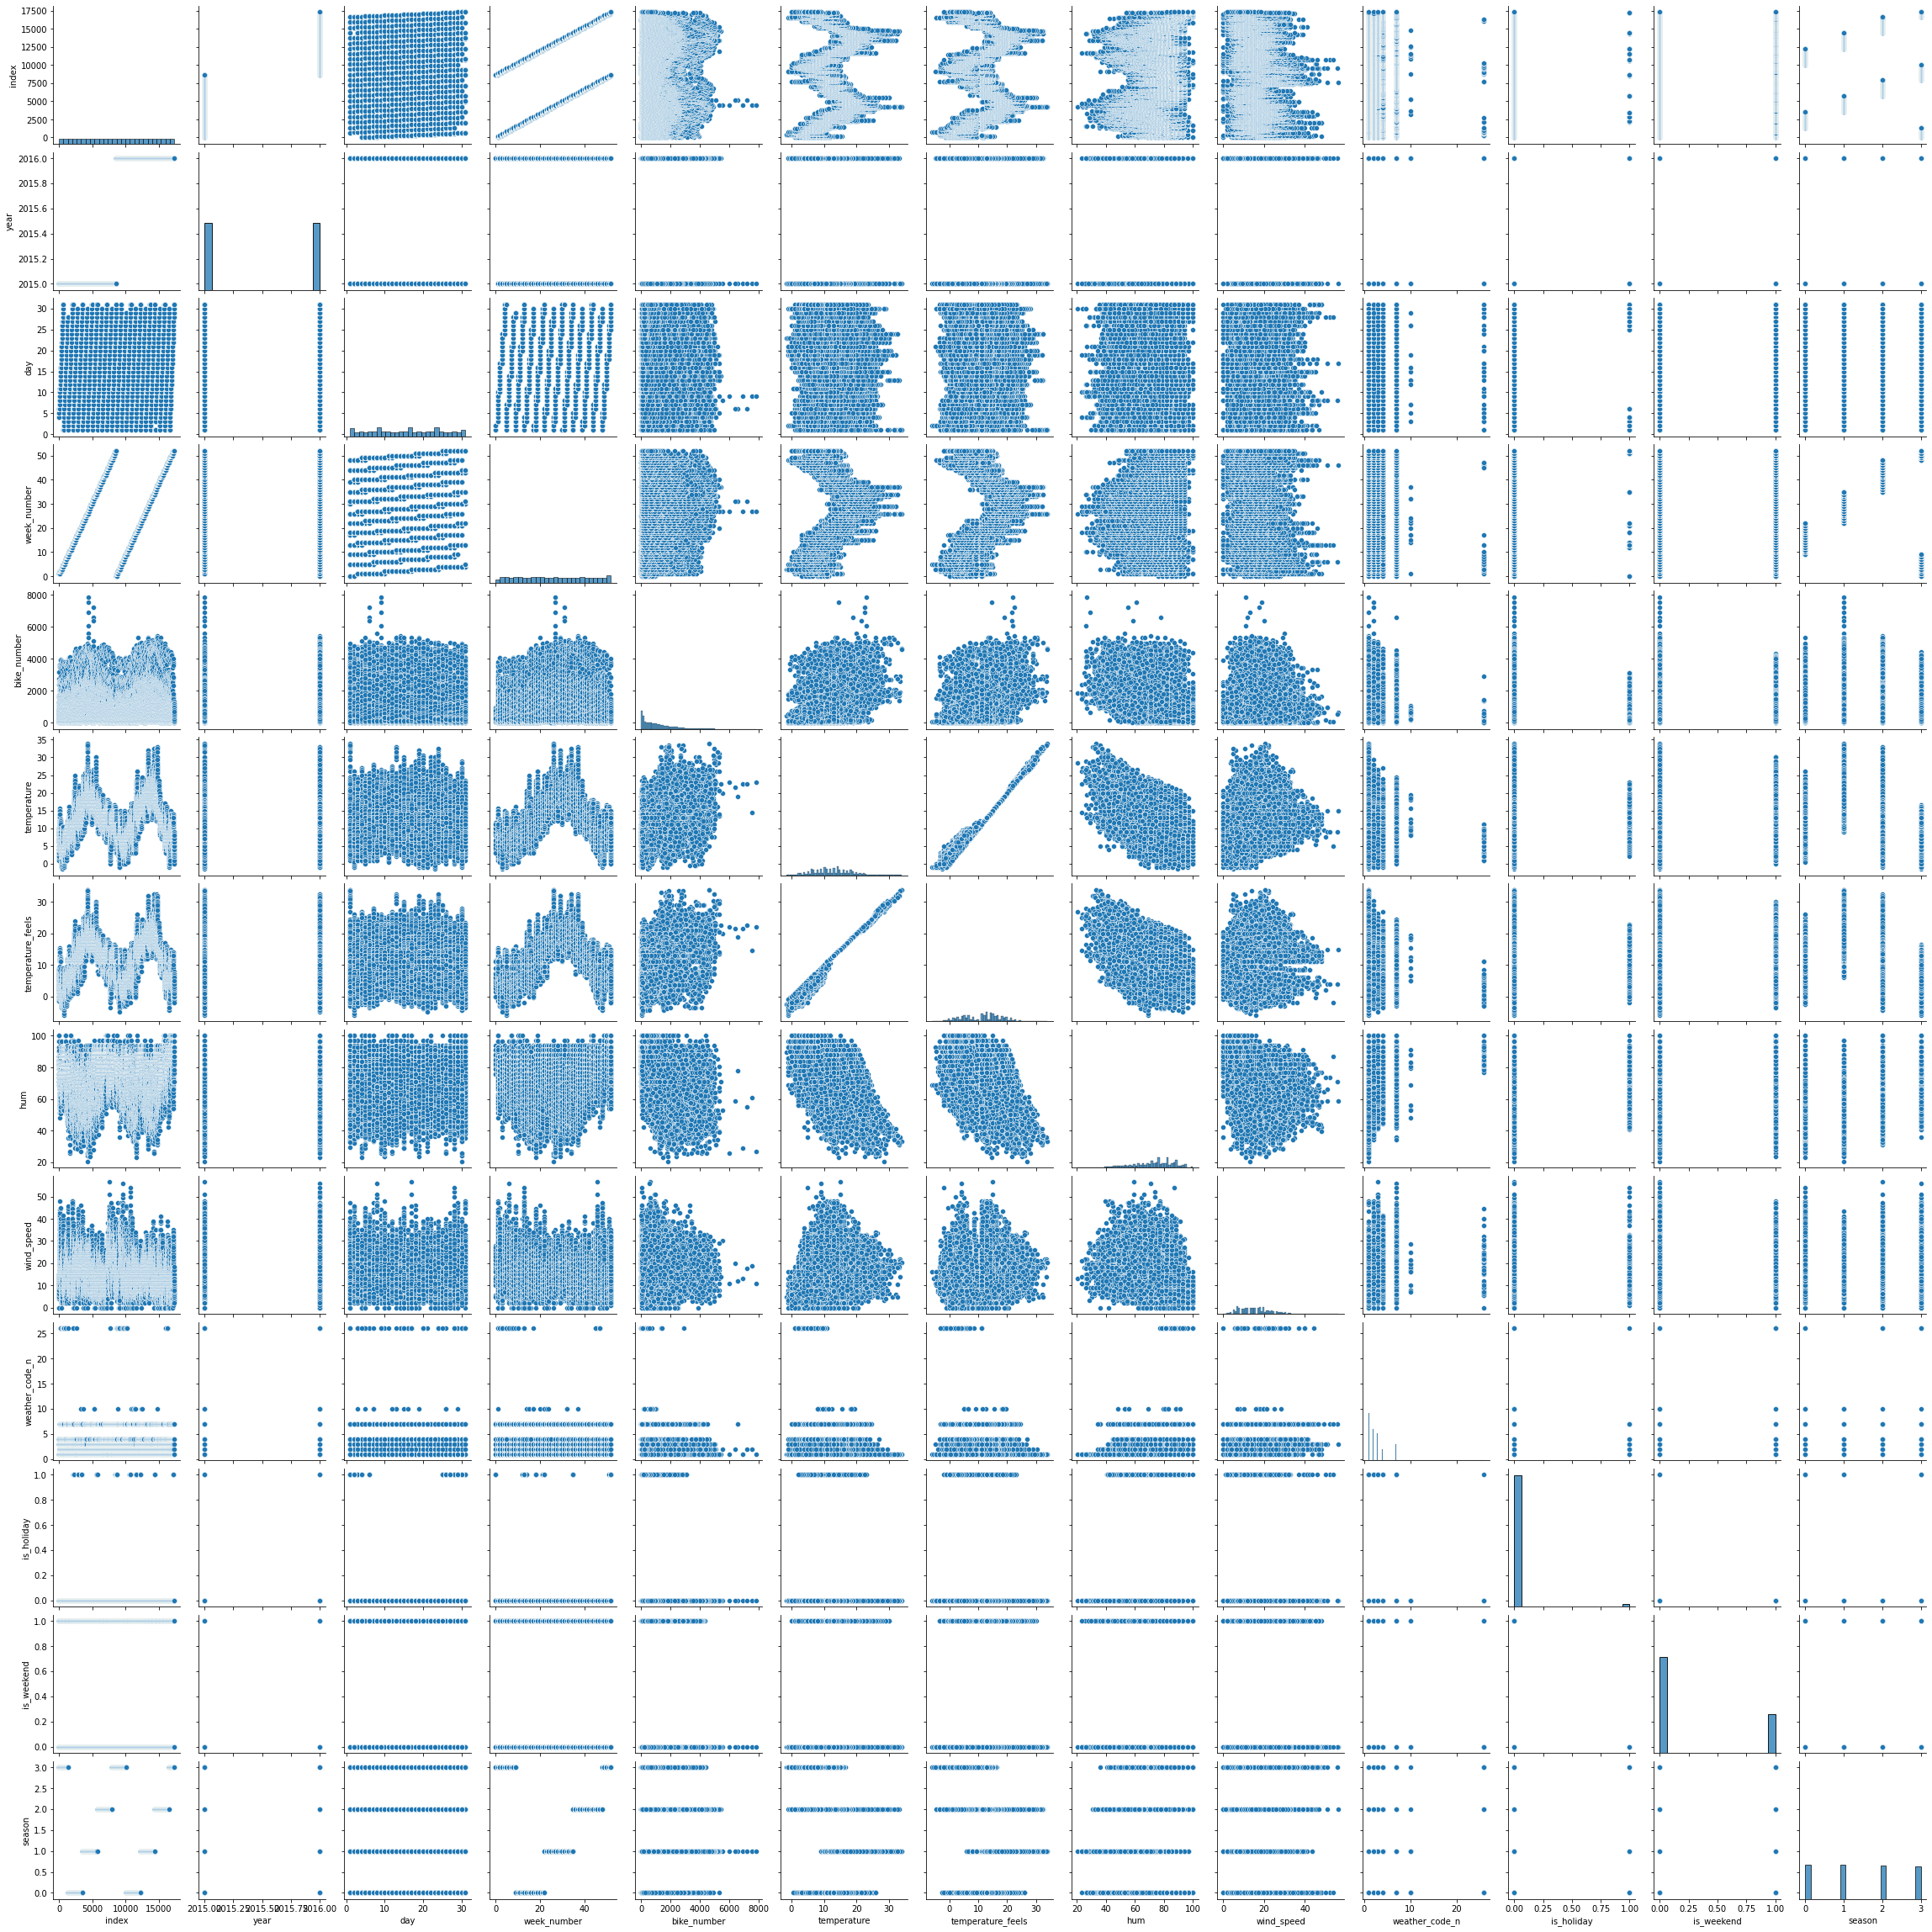

In [5]:
sns.pairplot(df)

<AxesSubplot:>

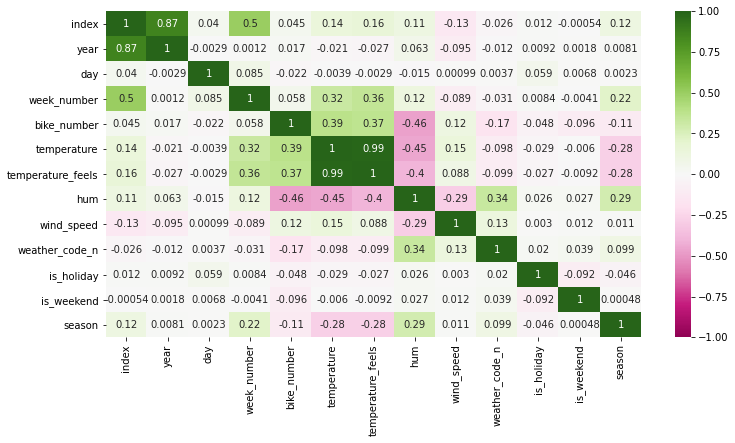

In [6]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='PiYG', vmin=-1, annot=True)

## Order Days of the week for future plots with PD.Categorical

In [7]:
df['day_name'] = pd.Categorical(df['day_name'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

 ## Full Dataset Week Days

### Full Dataset Week Days YEAR 2015 and Year 2016

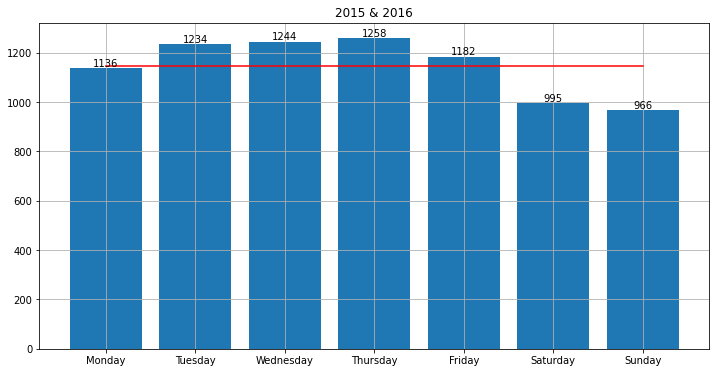

In [166]:
fig, ax = plt.subplots(1, figsize=(12,6))

y = [df['bike_number'].mean() for i in range(7)]
plt.plot(y, 'r')
x = df.groupby('day_name').bike_number.agg('mean')
rects = ax.bar(x.index, x.values)
plt.title('2015 & 2016')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects)

plt.grid()

### Full Dataset Week Days per Year - Subplot 2015 - 2016

In [ ]:
x_2015 = (df.loc[df['year']==2015].groupby('day_name').bike_number.agg('mean').round()).astype('int64')

In [ ]:
x_2016 = (df.loc[df['year']==2016].groupby('day_name').bike_number.agg('mean').round()).astype('int64')

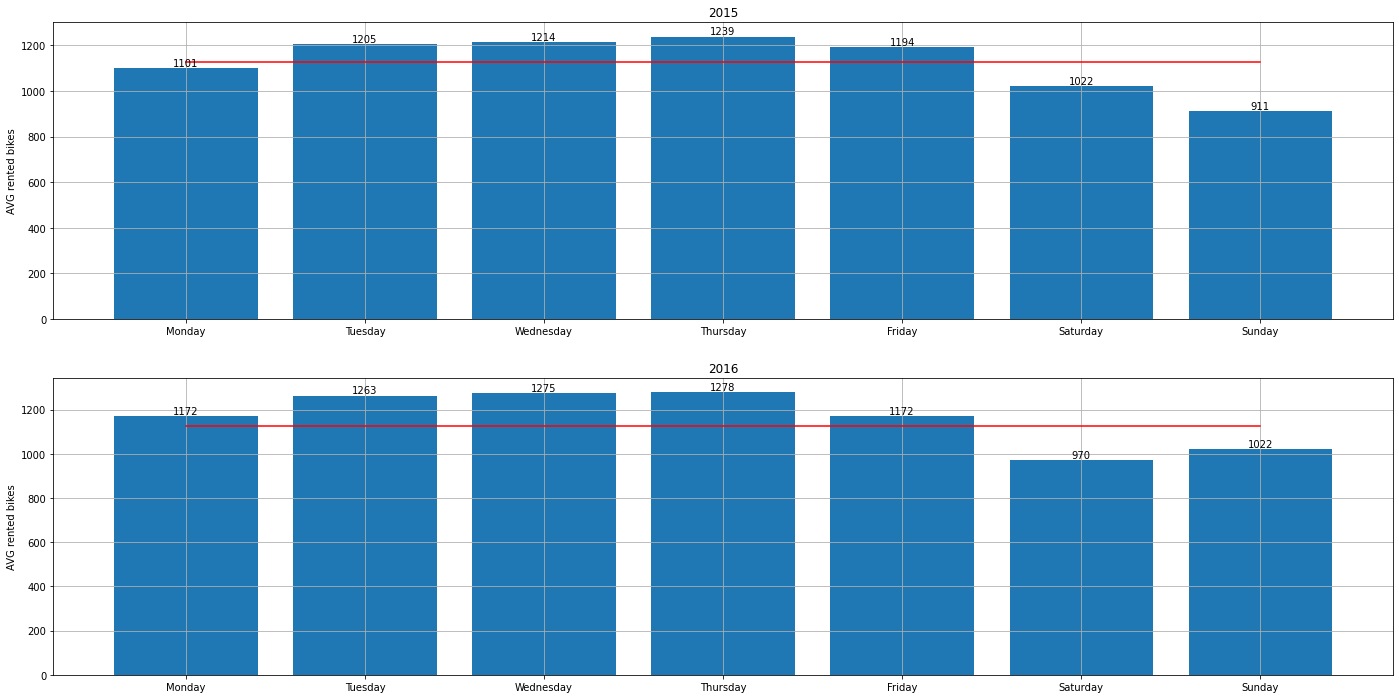

In [168]:
fig, ax = plt.subplots(2, figsize=(24,12))
y = [x_2015.values.mean() for i in range(7)]
j = [x_2015.values.mean() for i in range(7)]
ax[0].grid()
ax[0].plot(y, 'r')
ax[0].title.set_text('2015')
ax[0].set_ylabel('AVG rented bikes')

rects1 = ax[0].bar(x_2015.index, x_2015.values)
ax[1].grid()
ax[1].plot(j, 'r')
rects2 = ax[1].bar(x_2016.index, x_2016.values)
ax[1].title.set_text('2016')
ax[1].set_ylabel('AVG rented bikes')
def autolabel1(rects1):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects1:
        height = rect.get_height()
        ax[0].text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')
def autolabel2(rects2):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects2:
        height = rect.get_height()
        ax[1].text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel1(rects1)
autolabel2(rects2)


# Conclussions:

* 1- The weekdays are having higher usage of bicycles for 2015 - 2016 
* 2- Both Years the day with higher average of bikes usage is Thursday
* 3- There is difference between 2015 and 2016 usage during weekends, in 2015 Saturday had more bikes usages on Saturday but in 2017 the higher inflow during the weekend was on Sunday

day_name
Monday       1136.431562
Tuesday      1234.170899
Wednesday    1244.409000
Thursday     1258.810594
Friday       1182.772653
Saturday      995.553753
Sunday        966.261588
Name: bike_number, dtype: float64

In [138]:
(df.loc[df['year']==2015].groupby('day_name').bike_number.agg('mean').round()).astype('int64')

day_name
Monday       1101
Tuesday      1205
Wednesday    1214
Thursday     1239
Friday       1194
Saturday     1022
Sunday        911
Name: bike_number, dtype: int64

In [139]:
(df.loc[df['year']==2016].groupby('day_name').bike_number.agg('mean')).astype('int64')

day_name
Monday       1171
Tuesday      1263
Wednesday    1275
Thursday     1278
Friday       1171
Saturday      969
Sunday       1021
Name: bike_number, dtype: int64